# Downloading Required packages

In [61]:
!pwd

/home/hs/dl160_bkp/perf_engg/anaconda2/bin


In [62]:
import pandas

In [63]:
import numpy

In [64]:
import matplotlib

In [65]:
import seaborn

In [66]:
import scipy

In [67]:
import sklearn

In [68]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

In [126]:
data = pd.read_csv("/home/hs/dl160_bkp/perf_engg/cpu2017_results_20june.csv", header=None)
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]  # rename column names
data.V1 = data.V1.astype(str)
data.V2 = data.V2.astype(str)
data.V3 = data.V3.astype(str)
data.V4 = data.V4.astype(str)
data.V5 = data.V5.astype(str)
data.V6 = data.V6.astype(str)
data.V7 = data.V7.astype(str)
data.V8 = data.V8.astype(str)
data.V9 = data.V9.astype(str)

X = data.loc[1:, "V10":"V24"].astype(str).astype(float)  # independent variables data
y = data.V4  # dependednt variable data
Cname = data.V2
systemCat = data.V3
osCat = data.V7
compCat = data.V5
paralCat = data.V6
fsCat = data.V8
DrankCat = data.V9
data

V1                     V2  \
0       Benchmark      Hardware Vendor\t   
1        CINT2017  ASUSTeK Computer Inc.   
2        CINT2017  ASUSTeK Computer Inc.   
3        CINT2017  ASUSTeK Computer Inc.   
4        CINT2017  ASUSTeK Computer Inc.   
5        CINT2017          Cisco Systems   
6        CINT2017          Cisco Systems   
7        CINT2017          Cisco Systems   
8        CINT2017          Cisco Systems   
9        CINT2017          Cisco Systems   
...           ...                    ...   
3153  CFP2017rate             Supermicro   
3154  CFP2017rate             Supermicro   
3155  CFP2017rate             Supermicro   
3156  CFP2017rate             Supermicro   
3157  CFP2017rate             Supermicro   
3158  CFP2017rate             Supermicro   
3159  CFP2017rate             Supermicro   
3160  CFP2017rate             Supermicro   
3161  CFP2017rate                  Yadro   
3162  CFP2017rate                  Yadro   

                                                     V3  \
0                                                System   
1     ASUS RS700-E9(Z11PP-D24) Server System (2.10 G...   
2     ASUS RS700-E9(Z11PP-D24) Server System (2.70 G...   
3     ASUS WS C621E SAGE Server System (2.50 GHz, In...   
4     ASUS WS C621E SAGE Server System (3.00 GHz, In...   
5     Cisco UCS B200 M5 (Intel Xeon Bronze 3106, 1.7...   
6     Cisco UCS B200 M5 (Intel Xeon Gold 5115, 2.40 ...   
7     Cisco UCS B200 M5 (Intel Xeon Gold 5118, 2.30GHz)   
8     Cisco UCS B200 M5 (Intel Xeon Gold 5120, 2.20GHz)   
9     Cisco UCS B200 M5 (Intel Xeon Gold 5120, 2.20GHz)   
...                                                 ...   
3153  A+ Server 2123BT-HNC0R (H11DST-B , AMD EPYC 7601)   
3154    A+ Server 4023S-TRT (H11DSi-NT , AMD EPYC 7551)   
3155    A+ Server 4023S-TRT (H11DSi-NT , AMD EPYC 7601)   
3156  SuperServer 1029U-TR4 (X11DPU , Intel Xeon Pla...   
3157  SuperServer 2028U-TR4T+ (X10DRU-i+, Intel Xeon...   
3158  SuperServer 2029UZ-TN20R25M X11DPU-Z+ (Intel X...   
3159  SuperServer 2049U-TR4 (X11QPH+, Intel Xeon Pla...   
3160  SuperServer 7049P-TR (X11DPi-N, Intel Xeon Sil...   
3161        Yadro Vesnin (2.92 GHz, 40 cores, RHEL 7.4)   
3162        Yadro Vesnin (3.32 GHz, 32 cores, RHEL 7.2)   

                            V4  \
0                   Processor    
1     Intel Xeon Platinum 8176   
2         Intel Xeon Gold 6150   
3     Intel Xeon Platinum 8180   
4         Intel Xeon Gold 6154   
5       Intel Xeon Bronze 3106   
6         Intel Xeon Gold 5115   
7         Intel Xeon Gold 5118   
8         Intel Xeon Gold 5120   
9         Intel Xeon Gold 5120   
...                        ...   
3153             AMD EPYC 7601   
3154             AMD EPYC 7551   
3155             AMD EPYC 7601   
3156  Intel Xeon Platinum 8180   
3157    Intel Xeon E5-2699A v4   
3158  Intel Xeon Platinum 8180   
3159  Intel Xeon Platinum 8180   
3160    Intel Xeon Silver 4110   
3161                IBM POWER8   
3162                IBM POWER8   

                                                     V5               V6  \
0                                              Compiler  Parallelization   
1     C/C++: Version 18.0.0.128 of Intel C/C++, Comp...              Yes   
2     C/C++: Version 18.0.0.128 of Intel C/C++, Comp...              Yes   
3     C/C++: Version 18.0.0.128 of Intel C/C++, Comp...              Yes   
4     C/C++: Version 18.0.0.128 of Intel C/C++, Comp...              Yes   
5     C/C++: Version 18.0.0.128 of Intel C/C++, Comp...              Yes   
6     C/C++: Version 18.0.0.128 of Intel C/C++, Comp...              Yes   
7     C/C++: Version 18.0.0.128 of Intel C/C++, Comp...              Yes   
8     C/C++: Version 18.0.0.128 of Intel C/C++, Comp...              Yes   
9     C/C++: Version 18.0.0.128 of Intel C/C++, Comp...              Yes   
...                                                 ...              ...   
3153  C/C++: Version 1.0.0 of AOCC, Fortran: Version...               No   
3154  C/C+

# A matrix scatter plot 
I have considered independent variables as the SUT parameters and Price performance of the spec cpu2017 scores as dependent variable. One common way of plotting multivariate data is to make a matrix scatterplot, showing each pair of variables plotted against each other. We can use the scatter_matrix() function from the pandas.tools.plotting package to do this.

To use the scatter_matrix() function, you need to give it as its input the variables that you want included in the plot. For now i am just checking the histogram of all variables. The parameter diagonal allows us to specify whether to plot a histogram ("hist") or a Kernel Density Estimation ("kde") for the variable.

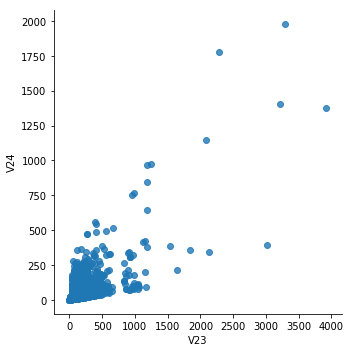

In [70]:
test=[]
data.V9 = data.V9.astype(str)
test=data.loc[1:,"V10":"V24"].astype(str).astype(float)
sns.lmplot("V23", "V24", test, fit_reg=False);

### Above Benchmark Score results are postively correlated to pp*
*Pp = performance obtained per $ = Base Performance/SKU cost

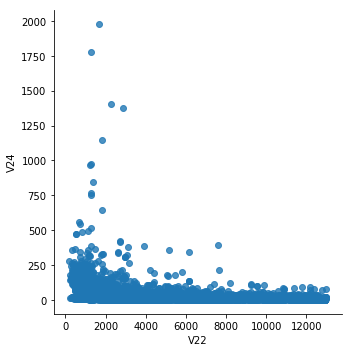

In [71]:
test=data.loc[1:,"V10":"V24"].astype(str).astype(float)
sns.lmplot("V22", "V24", test, fit_reg=False);

### Above Interestingly we see, as SKU cost is increased pp is reduced. 

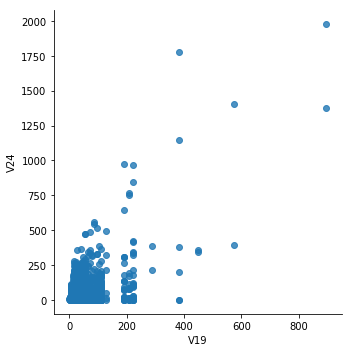

In [72]:
test=data.loc[1:,"V10":"V24"].astype(str).astype(float)
sns.lmplot("V19", "V24", test, fit_reg=False);

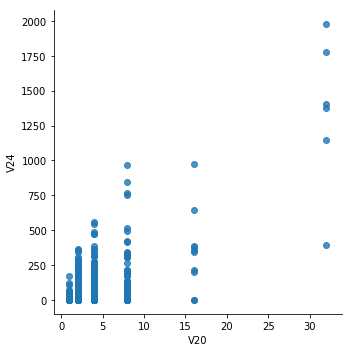

In [73]:
test=data.loc[1:,"V10":"V24"].astype(str).astype(float)
sns.lmplot("V20", "V24", test, fit_reg=False);

### From above we see with more the no of cores better pp seen, and also more no of ships has +ive correlation to pp

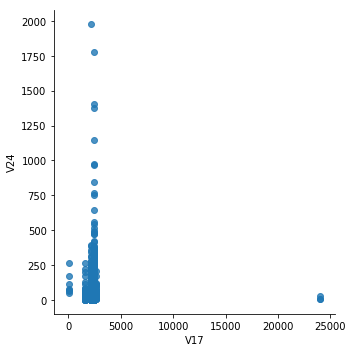

In [74]:
test=data.loc[1:,"V10":"V24"].astype(str).astype(float)
sns.lmplot("V17", "V24", test, fit_reg=False);

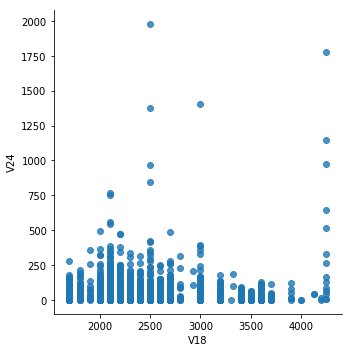

In [75]:
test=data.loc[1:,"V10":"V24"].astype(str).astype(float)
sns.lmplot("V18", "V24", test, fit_reg=False);

### From above, for roughly 2500 dim speed pp is affected +ively and high pp is seen for 2500~,4300MHz proc freq

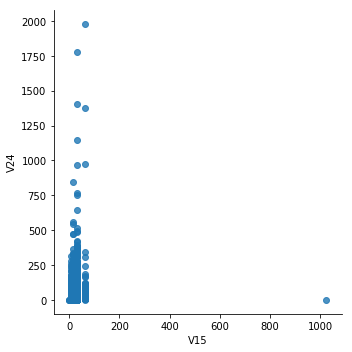

In [76]:
test=data.loc[1:,"V10":"V24"].astype(str).astype(float)
sns.lmplot("V15", "V24", test, fit_reg=False);

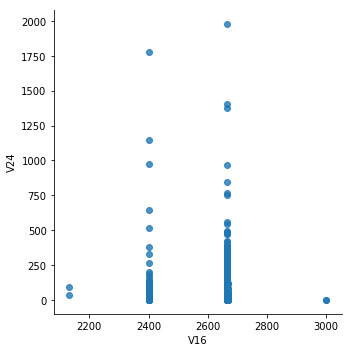

In [77]:
test=data.loc[1:,"V10":"V24"].astype(str).astype(float)
sns.lmplot("V16", "V24", test, fit_reg=False);

### From above, for lower Dimm size and high DIMM data rate  (2400 to 2500 range frequency) +ive correlation is seen w.r.t pp

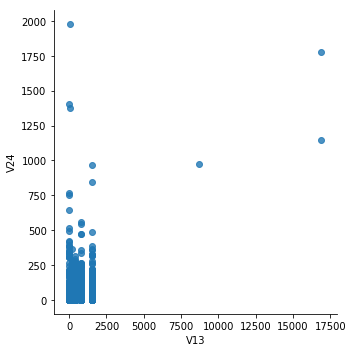

In [78]:
test=data.loc[1:,"V10":"V24"].astype(str).astype(float)
sns.lmplot("V13", "V24", test, fit_reg=False);

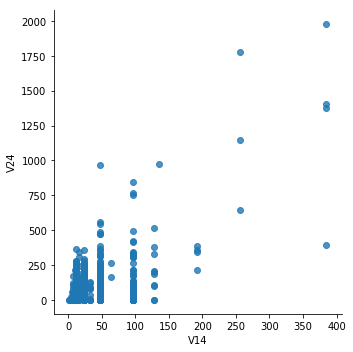

In [79]:
test=data.loc[1:,"V10":"V24"].astype(str).astype(float)
sns.lmplot("V14", "V24", test, fit_reg=False);

### Above, for lower memory size and more no of DIMMs +ive correlation is seen w.r.t pp

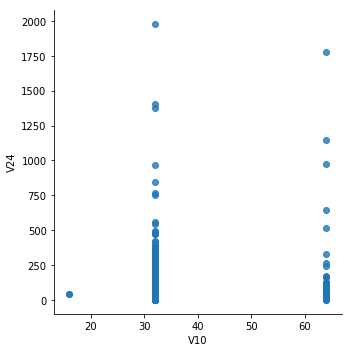

In [80]:
test=data.loc[1:,"V10":"V24"].astype(str).astype(float)
sns.lmplot("V10", "V24", test, fit_reg=False);

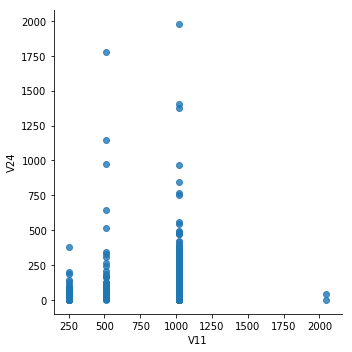

In [81]:
test=data.loc[1:,"V10":"V24"].astype(str).astype(float)
sns.lmplot("V11", "V24", test, fit_reg=False);

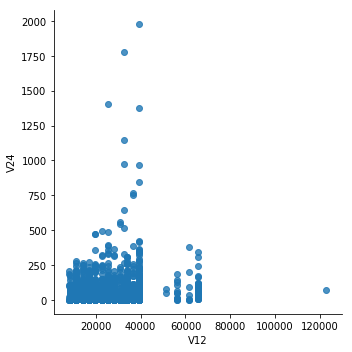

In [82]:
test=data.loc[1:,"V10":"V24"].astype(str).astype(float)
sns.lmplot("V12", "V24", test, fit_reg=False);

### From above 3 graphs w.r.t L1, L2, L3 cache sizes:

* L1 with lower size 32KB shows better correlation than >64KB size w.r.t pp
* L2 shows positive correlation upto 1KB size w.r.t pp
* L3 size <40KB shows +ive correlation w.r.t pp


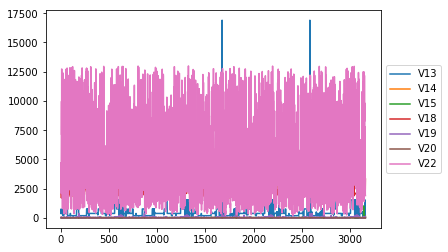

In [83]:
data.V13 = data.loc[1:].V13.astype(str).astype(float)
data.V14 = data.loc[1:].V14.astype(str).astype(float)
data.V15 = data.loc[1:].V15.astype(str).astype(float)
data.V18 = data.loc[1:].V18.astype(str).astype(float)
data.V19 = data.loc[1:].V19.astype(str).astype(float)
data.V20 = data.loc[1:].V20.astype(str).astype(float)
data.V22 = data.loc[1:].V22.astype(str).astype(float)
ax = test[["V13","V14","V15","V18","V19","V20","V22"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

It is clear from the profile plot that the mean and standard deviation for V18 (Processor frequency) is quite higher than that for the other variables. But V13 (Memory capacity) has some very large variations

### Below we see the mean of all independent variables considered in the dataset

In [84]:
X.apply(np.mean)

V10       33.153700
V11      994.853890
V12    24773.464896
V13      491.961733
V14       27.649273
V15       21.675838
V16     2661.173308
V17     2338.052815
V18     2427.124605
V19       42.118912
V20        2.626502
V21        1.629981
V22     5051.696395
V23      144.456638
V24       48.712174
dtype: float64

### Below standard deviation is calculated for all X variables

In [85]:
X.apply(np.std)

V10        6.006093
V11      130.128850
V12    11869.560893
V13      594.089492
V14       23.700709
V15       21.250909
V16       38.471726
V17      692.413435
V18      515.389279
V19       46.348163
V20        1.912698
V21        0.720855
V22     3715.528640
V23      202.940177
V24       91.261483
dtype: float64

### Since the mean and standard deviation for the above variables is not comparable lets standardise it. 

### Means and standard deviations- segregating data w.r.t only HPE

In [86]:
class2data = data[Cname=="Hewlett Packard Enterprise"]

 ### Lets calculate the mean and standard deviations of the independent variables - HPE dataset

In [87]:
hpeData =class2data.loc[:, "V10":"V24"].astype(str).astype(float) 

In [88]:
hpeData.apply(np.mean)

V10       32.056042
V11      990.823117
V12    26020.091068
V13      298.602452
V14       30.802102
V15       14.472855
V16     2659.478109
V17     2338.714536
V18     2498.073555
V19       46.311734
V20        2.700525
V21        1.523643
V22     5309.542907
V23      158.704466
V24       49.878719
dtype: float64

In [89]:
hpeData.apply(np.std)

V10        1.337985
V11      139.029065
V12    11805.132143
V13      202.273084
V14       35.150032
V15       12.616694
V16       41.137429
V17      920.471567
V18      527.638696
V19       75.190878
V20        3.031588
V21        0.499441
V22     3705.868315
V23      326.431191
V24      127.948459
dtype: float64

In [90]:
# A function for calculating the mean and standard deviation for different groups
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))

In [91]:
printMeanAndSdByGroup(X, Cname)

## Means:


V10          V11            V12  \
V2                                                                          
ASUSTeK Computer Inc.               32.000000   950.857143   30415.238095   
Cisco Systems                       32.000000  1024.000000   24056.685714   
Dell Inc.                           34.305476   984.899135   24892.126801   
Epsylon Sp. z o.o. Sp. Komandytowa  32.000000  1024.000000   17600.000000   
Fujitsu                             41.290323   825.806452   30459.870968   
H3C                                 32.000000   256.000000   20480.000000   
Hewlett Packard Enterprise          32.056042   990.823117   26020.091068   
Huawei                              32.000000  1024.000000   23224.430108   
IBM Corporation                     64.000000   512.000000  122880.000000   
Inspur Corporation                  32.000000   870.400000   25395.200000   
Lenovo Global Technology            32.000000  1021.354005   22709.912145   
M Computers s.r.o.                  32.000000  1024.000000   15018.666667   
Oracle Corporation                  16.000000  1536.000000   65536.000000   
Sugon                               56.888889   625.777778   56813.037037   
Sun Microsystems                    48.000000  1152.000000   32768.000000   
Supermicro                          52.114286   636.342857   54652.342857   
Yadro                               32.000000   512.000000    8192.000000   

                                            V13         V14         V15  \
V2                                                                        
ASUSTeK Computer Inc.                460.190476   17.904762   25.904762   
Cisco Systems                        465.502041   28.897959   16.130612   
Dell Inc.                            306.585014   18.399135   19.550432   
Epsylon Sp. z o.o. Sp. Komandytowa   362.666667   22.666667   16.000000   
Fujitsu                             1348.000000   61.903226   22.193548   
H3C                                  256.000000   16.000000   16.000000   
Hewlett Packard Enterprise           298.602452   30.802102   14.472855   
Huawei                               408.774194   24.516129   16.344086   
IBM Corporation                      256.000000   16.000000   16.000000   
Inspur Corporation                   665.600000   22.400000   28.800000   
Lenovo Global Technology             695.931094   30.959518   26.570198   
M Computers s.r.o.                   384.000000   24.000000   16.000000   
Oracle Corporation                   480.000000   16.000000   32.000000   
Sugon                                256.333333   13.925926   45.037037   
Sun Microsystems                      32.000000   32.000000  256.750000   
Supermicro                           278.571429   18.742857   52.114286   
Yadro                                  6.000000  128.000000   48.000000   

                                            V16          V17          V18  \
V2                                                                          
ASUSTeK Computer Inc.               2697.809524  2400.000000  2657.142857   
Cisco Systems                       2666.000000  2283.391837  2510.612245   
Dell Inc.                           2664.463977  2330.628242  2410.951009   
Epsylon Sp. z o.o. Sp. Komandytowa  2666.000000  2400.000000  2658.333333   
Fujitsu                             2571.612903  2136.258065  2885.483871   
H3C                                 2400.000000  2400.000000  2100.000000   
Hewlett Packard Enterprise          2659.478109  2338.714536  2498.073555   
Huawei                              2666.000000  2331.096774  2520.788530   
IBM Corporation                     2666.000000  2400.000000  3400.000000   
Inspur Corporation                  2612.800000  2400.000000  2273.333333   
Lenovo Global Technology            2665.083549  2358.604651  2339.793282   
M Computers s.r.o.                  2541.866667  2400.000000  2200.000000   
Oracle Corporation                  2400.000000  2400.000000  4133.000000 


## Standard deviations:


V10         V11           V12  \
V2                                                                        
ASUSTeK Computer Inc.                0.000000  225.441426   9833.808631   
Cisco Systems                        0.000000    0.000000   9255.719216   
Dell Inc.                            8.274056  138.048393  13140.627677   
Epsylon Sp. z o.o. Sp. Komandytowa   0.000000    0.000000   9205.994569   
Fujitsu                             14.525158  273.639912  10253.667466   
H3C                                  0.000000    0.000000      0.000000   
Hewlett Packard Enterprise           1.337985  139.029065  11805.132143   
Huawei                               0.000000    0.000000   8130.727031   
IBM Corporation                      0.000000    0.000000      0.000000   
Inspur Corporation                   0.000000  307.200000  11593.606624   
Lenovo Global Technology             0.000000   45.001364   8868.910905   
M Computers s.r.o.                   0.000000    0.000000   4674.522302   
Oracle Corporation                   0.000000  512.000000      0.000000   
Sugon                               13.303671  212.858731  16896.851290   
Sun Microsystems                    16.000000  557.939065      0.000000   
Supermicro                          15.461974  255.057858  16387.813434   
Yadro                                0.000000    0.000000      0.000000   

                                            V13        V14         V15  \
V2                                                                       
ASUSTeK Computer Inc.                219.375655   7.546079    7.769934   
Cisco Systems                        159.865546   9.853301    1.439700   
Dell Inc.                            213.758639  12.923207   12.444443   
Epsylon Sp. z o.o. Sp. Komandytowa    47.702784   2.981424    0.000000   
Fujitsu                             3073.131879  59.210317    9.247212   
H3C                                    0.000000   0.000000    0.000000   
Hewlett Packard Enterprise           202.273084  35.150032   12.616694   
Huawei                               167.111072   3.481481    2.320987   
IBM Corporation                        0.000000   0.000000    0.000000   
Inspur Corporation                   204.800000   3.200000    6.400000   
Lenovo Global Technology             512.554114  20.749586    7.575888   
M Computers s.r.o.                     0.000000   0.000000    0.000000   
Oracle Corporation                     0.000000   0.000000    0.000000   
Sugon                                199.698105   5.483483   18.999964   
Sun Microsystems                       0.000000   0.000000  442.971994   
Supermicro                           428.493126   8.043961   15.461974   
Yadro                                  2.000000   0.000000   16.000000   

                                           V16          V17         V18  \
V2                                                                        
ASUSTeK Computer Inc.                98.043537     0.000000  531.459293   
Cisco Systems                         0.000000   132.427021  493.353407   
Dell Inc.                            28.571680  1185.139254  503.212693   
Epsylon Sp. z o.o. Sp. Komandytowa    0.000000     0.000000  572.215480   
Fujitsu                             127.271535   739.284352  866.229645   
H3C                                   0.000000     0.000000    0.000000   
Hewlett Packard Enterprise           41.137429   920.471567  527.638696   
Huawei                                0.000000   116.831104  550.527367   
IBM Corporation                       0.000000     0.000000    0.000000   
Inspur Corporation                  106.400000     0.000000  259.401019   
Lenovo Global Technology             15.586410    96.638415  465.041050   
M Computers s.r.o.                  132.704115     0.000000  242.212028   
Oracle Corporation                    0.000000     0.000000    0.000000   
Sugon                                 0.000000     0.000000  223.330569   
Sun Micro


## Sample sizes:


0
V2                                      
ASUSTeK Computer Inc.                 21
Cisco Systems                        245
Dell Inc.                            694
Epsylon Sp. z o.o. Sp. Komandytowa    24
Fujitsu                               62
H3C                                    2
Hewlett Packard Enterprise           571
Huawei                               279
IBM Corporation                        1
Inspur Corporation                    15
Lenovo Global Technology            1161
M Computers s.r.o.                    15
Oracle Corporation                     2
Sugon                                 27
Sun Microsystems                       4
Supermicro                            35
Yadro                                  4

### Calculating Correlations for independent variables vs dependent variable for HPE data. For example how is no of cores related to price performance?

In [92]:
corr = stats.pearsonr(hpeData.V19, hpeData.V24)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

('p-value:\t', 1.2306600284195103e-121)
('cor:\t\t', 0.7873731367325963)


In [93]:
corrmat = hpeData.corr()
corrmat

V10       V11       V12       V13       V14       V15       V16  \
V10  1.000000 -0.144255  0.140205  0.044189 -0.027171  0.164422  0.006640   
V11 -0.144255  1.000000 -0.561862  0.156375  0.047280 -0.728193  0.587720   
V12  0.140205 -0.561862  1.000000 -0.064652  0.100904  0.558198 -0.287079   
V13  0.044189  0.156375 -0.064652  1.000000  0.041016 -0.052662  0.000248   
V14 -0.027171  0.047280  0.100904  0.041016  1.000000  0.209440 -0.068548   
V15  0.164422 -0.728193  0.558198 -0.052662  0.209440  1.000000 -0.277687   
V16  0.006640  0.587720 -0.287079  0.000248 -0.068548 -0.277687  1.000000   
V17  0.002789  0.038334 -0.069737 -0.014120 -0.007811 -0.045382  0.032110   
V18 -0.023662  0.115862 -0.128501  0.041290  0.065107 -0.138925  0.053076   
V19 -0.007972 -0.076037  0.330485 -0.031573  0.931925  0.323080 -0.189709   
V20 -0.023495 -0.033147  0.158330  0.002613  0.984636  0.278520 -0.176284   
V21  0.039950 -0.169493  0.168686 -0.064283  0.105164  0.222515 -0.037843   
V22 -0.024928  0.004462  0.307902  0.146333  0.007153  0.054561  0.080539   
V23 -0.003555 -0.057482  0.201664 -0.086250  0.917320  0.310523 -0.026103   
V24 -0.002513 -0.037095  0.103827 -0.105186  0.788165  0.272442 -0.013867   

          V17       V18       V19       V20       V21       V22       V23  \
V10  0.002789 -0.023662 -0.007972 -0.023495  0.039950 -0.024928 -0.003555   
V11  0.038334  0.115862 -0.076037 -0.033147 -0.169493  0.004462 -0.057482   
V12 -0.069737 -0.128501  0.330485  0.158330  0.168686  0.307902  0.201664   
V13 -0.014120  0.041290 -0.031573  0.002613 -0.064283  0.146333 -0.086250   
V14 -0.007811  0.065107  0.931925  0.984636  0.105164  0.007153  0.917320   
V15 -0.045382 -0.138925  0.323080  0.278520  0.222515  0.054561  0.310523   
V16  0.032110  0.053076 -0.189709 -0.176284 -0.037843  0.080539 -0.026103   
V17  1.000000 -0.045617 -0.025248 -0.014937 -0.088852 -0.040345 -0.034531   
V18 -0.045617  1.000000 -0.063030  0.049565  0.006486  0.109599  0.010745   
V19 -0.025248 -0.063030  1.000000  0.952036  0.137145  0.053655  0.899054   
V20 -0.014937  0.049565  0.952036  1.000000  0.123235 -0.000890  0.900235   
V21 -0.088852  0.006486  0.137145  0.123235  1.000000  0.069189  0.304922   
V22 -0.040345  0.109599  0.053655 -0.000890  0.069189  1.000000  0.030006   
V23 -0.034531  0.010745  0.899054  0.900235  0.304922  0.030006  1.000000   
V24 -0.027831 -0.023888  0.787373  0.770046  0.211871 -0.223825  0.837379   

          V24  
V10 -0.002513  
V11 -0.037095  
V12  0.103827  
V13 -0.105186  
V14  0.788165  
V15  0.272442  
V16 -0.013867  
V17 -0.027831  
V18 -0.023888  
V19  0.787373  
V20  0.770046  
V21  0.211871  
V22 -0.223825  
V23  0.837379  
V24  1.000000

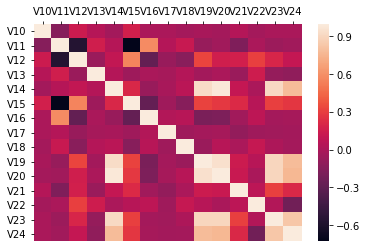

In [94]:
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

### Better visualization of the input paramters vs Price Performance in HPE data is below

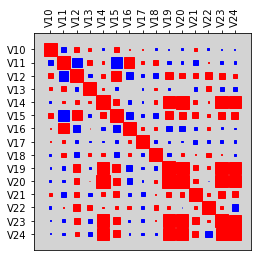

In [95]:
# adapted from http://matplotlib.org/examples/specialty_plots/hinton_demo.html
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'red' if w > 0 else 'blue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)

    ax.autoscale_view()
    ax.invert_yaxis()

hinton(corrmat)

Above we see red color for positive correlations and blue for negative correlations. So we have most correlated input paramters correlated to pp are as below in a descending order:

* V23 - Baseline performance of cpu2017 off course!,

* V14 - Number of DIMMs,

* V19 - No of Cores,

* V20 - No of Chips,


     V21 - Enabled Threads Per Core
     V15 - DIMM Size in GB
     V12 - L3 cache size in KB


The function mosthighlycorrelated() will print out the linear correlation coefficients for each pair of variables in the data set, in order of the correlation coefficient. This lets you see very easily which pair of variables are most highly correlated.

### Function to find top n correlations

In [96]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [97]:
mosthighlycorrelated(hpeData, 15)

FirstVariable SecondVariable  Correlation
0            V14            V20     0.984636
1            V19            V20     0.952036
2            V14            V19     0.931925
3            V14            V23     0.917320
4            V20            V23     0.900235
5            V19            V23     0.899054
6            V23            V24     0.837379
7            V14            V24     0.788165
8            V19            V24     0.787373
9            V20            V24     0.770046
10           V11            V15    -0.728193
11           V11            V16     0.587720
12           V11            V12    -0.561862
13           V12            V15     0.558198
14           V12            V19     0.330485

# Standardising Variables for HPE dataset
If you want to compare different variables that have different units, are very different variances, it is a good idea to first standardise the variables.



For example, we found above that the input paramters (numeric columns other than pp) show a wide range of standard deviations.

As a result, it is not a good idea to use the unstandardised input paramters/independent variables as the input for a principal component analysis (PCA, see below) of the hpedataset, as if you did that, the first principal component would be dominated by the variables which show the largest variances.

Thus, it would be a better idea to first standardise the variables so that they all have variance 1 and mean 0, and to then carry out the principal component analysis on the standardised data. This would allow us to find the principal components that provide the best low-dimensional representation of the variation in the original data, without being overly biased by those variables that show the most variance in the original data.

standardise variables can be done by using the scale() function from the package sklearn.preprocessing.

For example, to standardise the independent variables/input paramters in the hpe dataset , we type: 

In [98]:
standardisedH = scale(hpeData)
standardisedH = pd.DataFrame(standardisedH, index=hpeData.index, columns=hpeData.columns)

In [99]:
standardisedH.apply(np.mean)

V10   -2.282349e-15
V11    7.323389e-16
V12   -3.927584e-17
V13   -3.653431e-16
V14   -1.847131e-18
V15   -1.024186e-16
V16   -1.111001e-15
V17    7.351582e-16
V18    1.322157e-16
V19    4.919202e-17
V20    1.504926e-16
V21    4.991920e-15
V22   -9.507864e-17
V23   -1.028560e-16
V24   -2.945688e-17
dtype: float64

In [100]:
standardisedH.apply(np.std)

V10    1.0
V11    1.0
V12    1.0
V13    1.0
V14    1.0
V15    1.0
V16    1.0
V17    1.0
V18    1.0
V19    1.0
V20    1.0
V21    1.0
V22    1.0
V23    1.0
V24    1.0
dtype: float64

# Principal Component Analysis

The purpose of principal component analysis is to find the best low-dimensional representation of the variation in a multivariate data set. For example, in the case of the hpe dataset, we have 14 input paramters describing factors affecting price performance (output variable) of the cpu2017 scores for different SKUs.
We can carry out a principal component analysis to investigate whether we can capture most of the variation between samples using a smaller number of new variables (principal components), where each of these new variables is a linear combination of all or some of the 14 input paramters/independant variables.

To carry out a principal component analysis (PCA) on a multivariate data set, the first step is often to standardise the variables under study using the scale() function (see above). This is necessary if the input variables have very different variances, which is true in this case. Once you have standardised 
your variables, you can carry out a principal component analysis using the PCA class from sklearn.decomposition package and its fit method, which fits the model with the data. The default solver is Singular Value Decomposition ("svd"). 

For example, to standardise the 14 input paramters including the pp (output variable), in the HPE dataset, and carry out a principal components analysis on the standardised independent /dependent variables, we type:

In [101]:
pca = PCA().fit(standardisedH)

You can get a summary of the principal component analysis results using the pca_summary() function below, which simulates the output of above function on a PCA model for the dataset:

In [102]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [103]:
summary = pca_summary(pca, standardisedH)

Importance of components:


sdev                varprop               cumprop
     Standard deviation Proportion of Variance Cumulative Proportion
PC1            2.193108               0.320648              0.320648
PC2            1.577246               0.165847              0.486495
PC3            1.154681               0.088886              0.575381
PC4            1.048848               0.073339              0.648720
PC5            1.024026               0.069909              0.718628
PC6            0.995736               0.066099              0.784728
PC7            0.967242               0.062370              0.847098
PC8            0.917606               0.056133              0.903232
PC9            0.783207               0.040894              0.944126
PC10           0.628037               0.026295              0.970421
PC11           0.453299               0.013699              0.984120
PC12           0.382956               0.009777              0.993897
PC13           0.242105               0.003908              0.997804
PC14           0.167212               0.001864              0.999668
PC15           0.070521               0.000332              1.000000

This gives us the standard deviation of each component, and the proportion of variance explained by each component.
The total variance explained by the components is the sum of the variances of the components:

In [104]:
np.sum(summary.sdev**2)

Standard deviation    15.0
dtype: float64

# Deciding How Many Principal Components to Retain

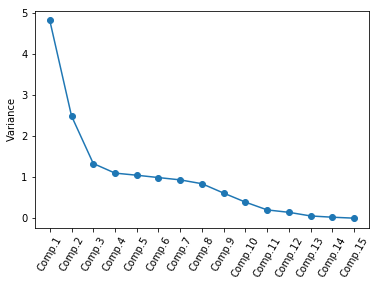

In [105]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardisedH)

The most obvious change in slope in the screen plot occurs at component 3, which is the "elbow" of the screen plot. Therefore, it cound be argued based on the basis of the screen plot that the first three components should be retained.

Another way of deciding how many components to retain is to use Kaiser’s criterion: that we should only retain principal components for which the variance is above 1 (when principal component analysis was applied to standardised data). We can check this by finding the variance of each of the principal components:

In [106]:
summary.sdev**2

Standard deviation
PC1             4.809721
PC2             2.487705
PC3             1.333289
PC4             1.100081
PC5             1.048628
PC6             0.991490
PC7             0.935557
PC8             0.842001
PC9             0.613413
PC10            0.394430
PC11            0.205480
PC12            0.146656
PC13            0.058615
PC14            0.027960
PC15            0.004973

# Loadings for the Principal Components
### PC1

In [121]:
pca.components_[0]

array([ 0.01283495, -0.10573522,  0.16236821, -0.0312423 ,  0.42135765,
        0.21474762, -0.09933206, -0.02224206, -0.01343386,  0.43680653,
        0.43003383,  0.12393412,  0.00222562,  0.43062019,  0.38805612])

# Change this appropriately harsha
This means that the first principal component is a linear combination of the variables:

0.01283495 Z10, -0.10573522 Z11 ,  0.16236821 Z12, -0.0312423 ,  0.42135765,
        0.21474762, -0.09933206, -0.02224206, -0.01343386,  0.43680653,
        0.43003383,  0.12393412,  0.00222562,  0.43062019,  0.38805612 Z24
where Z10, Z11, Z12, ... Z24 are the standardised versions of the variables V10, V11, V12, ... V24 (that each have mean of 0 and variance of 1).

Note that the square of the loadings sum to 1, as this is a constraint used in calculating the loadings:

In [122]:
np.sum(pca.components_[0]**2)

0.9999999999999987

In [123]:
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [124]:
calcpc(standardisedH, pca.components_[0])

array([ 6.22858825, -0.71380396, -0.96453217, -1.05775665, -0.80393968,
       -0.92916491, -1.1763122 , -1.73094064, -1.15040423, -1.14745322,
       -0.78534885, -0.91356797, -0.59874004, -0.91290361, -0.72669483,
       -0.66344054, -0.60261887, -0.53923145, -1.15843062, -1.02172804,
       -0.97616427, -1.09908988, -1.04048849, -0.85431448, -0.6697451 ,
       -1.10782332, -0.79195868, -0.54570952, -1.01094229, -0.98624801,
       -0.92156152, -1.25762178, -0.86372738, -0.67983146, -0.93092839,
       -0.94168582, -0.87140099, -0.94292252, -0.99506928, -0.94581514,
       -1.08779407, -1.00100279, -1.1650887 , -1.14978349, -1.21193457,
       -1.14839436, -1.13994626, -0.78536865, -0.91234494, -0.59962723,
       -0.89585246, -0.72658127, -0.66305384, -0.58783639, -0.54032167,
       -1.15838852, -1.03523768, -0.96946492, -1.10272526, -1.02663391,
       -0.85459707, -0.66974728, -1.1056687 , -0.79635845, -0.55041618,
       -0.55043335, -1.01103121, -0.98635354, -0.92468087, -1.26

In fact, the values of the first principal component are computed with the following, so we can compare those values to the ones that we calculated, and they should agree:

In [125]:
pca.transform(standardisedH)[:, 0]

array([ 6.22858825, -0.71380396, -0.96453217, -1.05775665, -0.80393968,
       -0.92916491, -1.1763122 , -1.73094064, -1.15040423, -1.14745322,
       -0.78534885, -0.91356797, -0.59874004, -0.91290361, -0.72669483,
       -0.66344054, -0.60261887, -0.53923145, -1.15843062, -1.02172804,
       -0.97616427, -1.09908988, -1.04048849, -0.85431448, -0.6697451 ,
       -1.10782332, -0.79195868, -0.54570952, -1.01094229, -0.98624801,
       -0.92156152, -1.25762178, -0.86372738, -0.67983146, -0.93092839,
       -0.94168582, -0.87140099, -0.94292252, -0.99506928, -0.94581514,
       -1.08779407, -1.00100279, -1.1650887 , -1.14978349, -1.21193457,
       -1.14839436, -1.13994626, -0.78536865, -0.91234494, -0.59962723,
       -0.89585246, -0.72658127, -0.66305384, -0.58783639, -0.54032167,
       -1.15838852, -1.03523768, -0.96946492, -1.10272526, -1.02663391,
       -0.85459707, -0.66974728, -1.1056687 , -0.79635845, -0.55041618,
       -0.55043335, -1.01103121, -0.98635354, -0.92468087, -1.26

# PC2:

In [112]:
pca.components_[1]

array([ 0.15129779, -0.5610386 ,  0.43887718, -0.07633978, -0.19935498,
        0.43995194, -0.35384093, -0.05148449, -0.14001156, -0.07327942,
       -0.13884675,  0.12494711,  0.08853252, -0.12085302, -0.14297826])

In [113]:
np.sum(pca.components_[1]**2)

0.9999999999999988

# PC3

In [114]:
pca.components_[2]

array([-0.03593716, -0.12687907, -0.24406244, -0.41196859, -0.04484256,
        0.00259917, -0.17583668,  0.19381806, -0.31518162, -0.03647634,
       -0.01848526, -0.12339047, -0.73031279, -0.03262172,  0.17934939])

In [115]:
np.sum(pca.components_[2]**2)

1.0000000000000002

# PC4

In [116]:
pca.components_[3]

array([-0.0554664 , -0.04285838,  0.01430601,  0.48763476,  0.11374736,
       -0.02674837, -0.35963966,  0.39920225, -0.10828464,  0.11294007,
        0.12812511, -0.62371155,  0.03665363, -0.10632101, -0.11034695])

In [117]:
np.sum(pca.components_[3]**2)

1.0000000000000002

# PC5

In [118]:
pca.components_[4]

array([ 0.68467834,  0.11765776,  0.07715619,  0.12257972, -0.01373536,
        0.10872062,  0.42738212,  0.37298432, -0.38916819,  0.00158224,
       -0.0555548 ,  0.05453609,  0.0195124 ,  0.04314474,  0.05342882])

In [119]:
np.sum(pca.components_[4]**2)

0.9999999999999987

## Scatterplots of the Principal Components - SKU

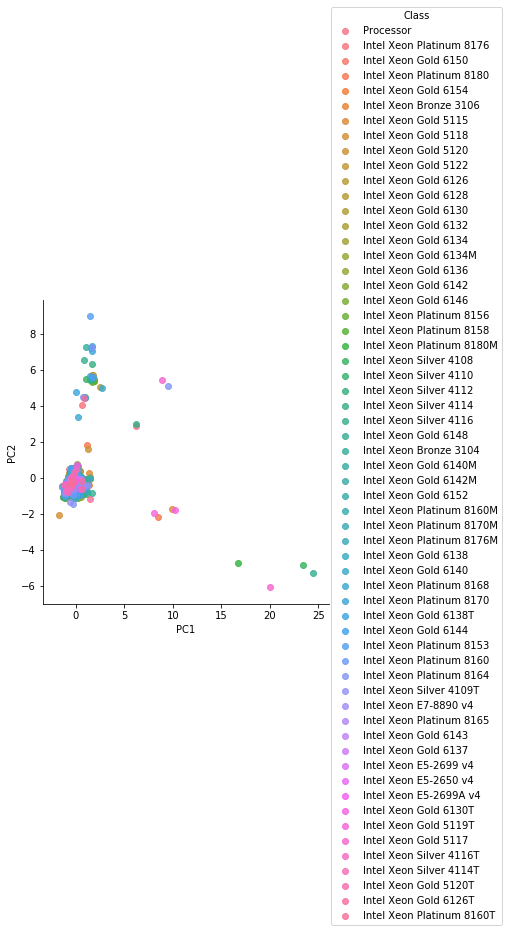

In [120]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedH, y)

## Scatterplots of the Principal Components - By Company

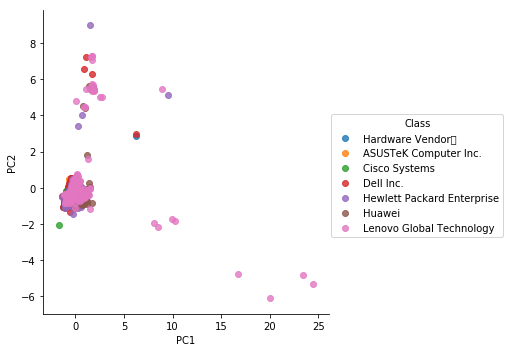

In [127]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedH, Cname)

## Scatterplots of the Principal Components - SUTs

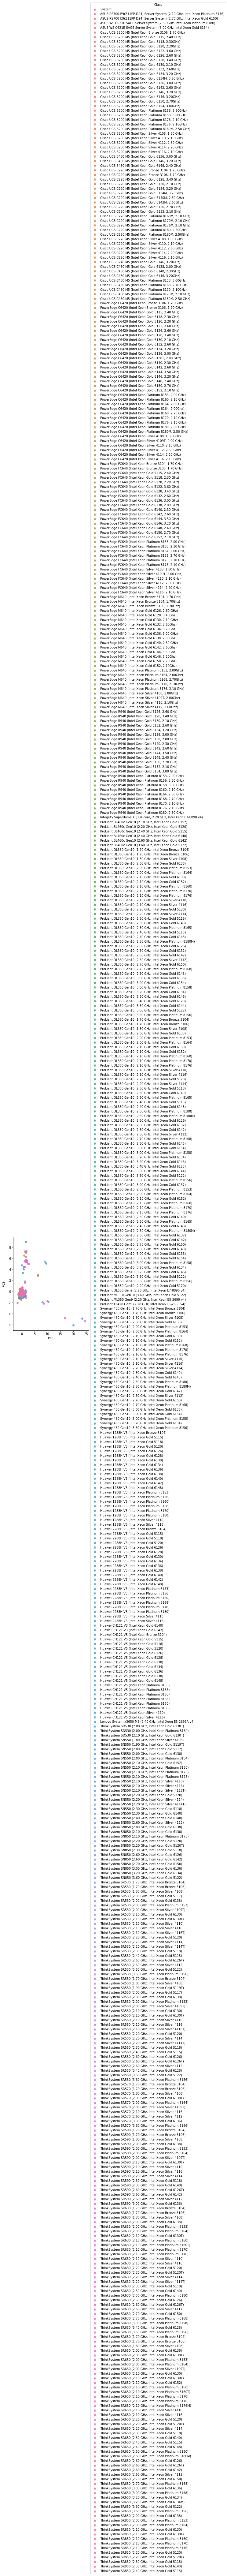

In [128]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedH, systemCat)

## Scatterplots of the Principal Components – By OS

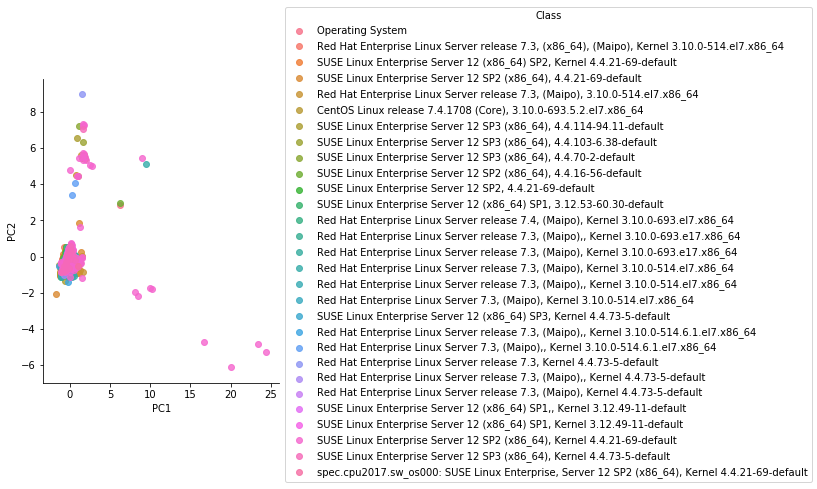

In [130]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedH, osCat)

## Scatterplots of the Principal Components – By Compiler

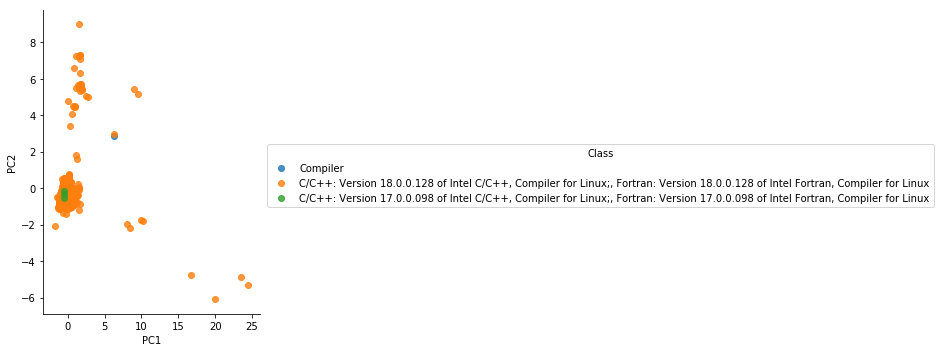

In [132]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedH, compCat)

## Scatterplots of the Principal Components – By Parallelization

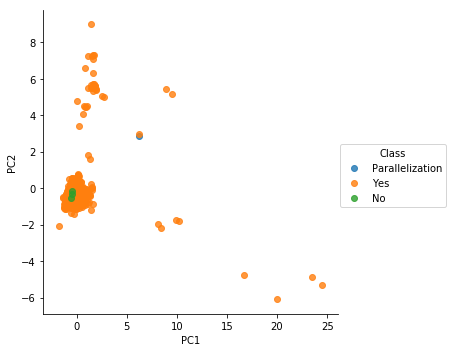

In [133]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedH, paralCat)

## Scatterplots of the Principal Components – By File System

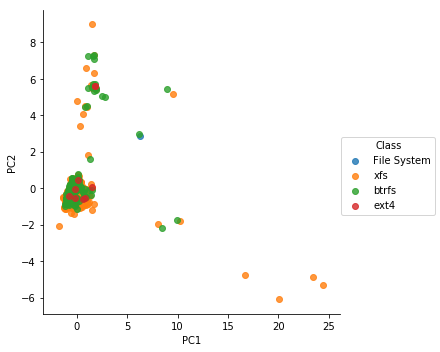

In [134]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedH, fsCat)

## Scatterplots of the Principal Components – By DIMM Rank

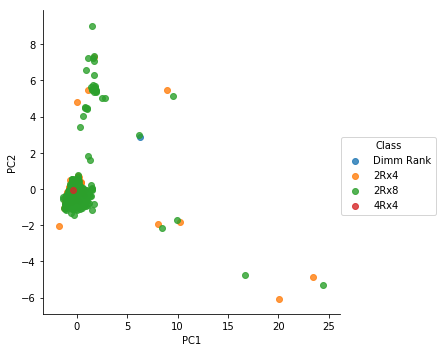

In [135]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedH, DrankCat)